In [0]:
rimport numpy as np
import pandas as pd
from xgboost import plot_importance


In [0]:
data = pd.read_csv('Data_A.csv')
data.head()

,MLP,CNN,LSTM,ConvLSTM,CNNLSTM,Y_Actual
0,745.45450,578.076660,593.918884,601.86250,603.209412,753.823965
1,354.08030,418.707611,404.187592,406.27112,403.875183,325.702181
2,369.19270,404.535706,413.250580,411.56372,405.864929,381.832205
3,436.41922,434.756683,435.081787,444.64954,441.274383,443.038006
4,516.93665,474.673157,514.759522,522.50120,508.574493,503.232639


In [0]:

mn = data.min()
mx = data.max()
data = (data-mn)/(mx-mn)

In [0]:
y = data.iloc[:,-1].values
x = data.iloc[:,:-1].values
x_train = x[:1304]
y_train = y[:1304]
x_test = x[1304:]
y_test = y[1304:]

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1304, 5)
(1304,)
(259, 5)
(259,)


In [0]:
import xgboost as xgb
model=xgb.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=10, reg_lambda=5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

model.fit(x_train, y_train)




[16:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=10, reg_lambda=5, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(x)
a_scale = (mx[5]-mn[5])*(y)+ mn[5]
p_scale = (mx[5]-mn[5])*(y_pred)+ mn[5]

In [0]:
print(a_scale.shape)
print(p_scale.shape)

(1563,)
(1563,)


In [0]:
test_a =np.array(a_scale[-259:])
test_p = np.array(p_scale[-259:])
train_a = np.array(a_scale[:-259])
train_p = np.array(p_scale[:-259])

In [0]:
test_a_10 = list()
test_p_10 = list()
for i in range(0, test_a.shape[0], 7):
        test_a_10.append(np.sum(test_a[i:i+7]))
        test_p_10.append(np.sum(test_p[i:i+7]))
test_a_10 = np.array(test_a_10)
test_a_10 = test_a_10.reshape(len(test_a_10),)
test_p_10 = np.array(test_p_10)
test_p_10 = test_p_10.reshape(len(test_p_10),)
test_a = test_a.reshape(len(test_a),)
test_p = test_p.reshape(len(test_p),)



train_a_10 = list()
train_p_10 = list()
for i in range(0, train_a.shape[0], 7):
        train_a_10.append(np.sum(train_a[i:i+7]))
        train_p_10.append(np.sum(train_p[i:i+7]))
train_a_10 = np.array(train_a_10)
train_a_10 = train_a_10.reshape(len(train_a_10),)
train_p_10 = np.array(train_p_10)
train_p_10 = train_p_10.reshape(len(train_p_10),)
train_a = train_a.reshape(len(train_a),)
train_p = train_p.reshape(len(train_p),)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(test_a_10,test_p_10)
print("Test_RMSE & R2",np.sqrt(mse)," ",r2_score(test_a_10,test_p_10))
mse = mean_squared_error(train_a_10,train_p_10)
print("Train_RMSE & R2",np.sqrt(mse)," ",r2_score(train_a_10,train_p_10))

Test_RMSE & R2 326.1861621016639   -0.6113293201258687
Train_RMSE & R2 122.71954881000727   0.8449971812063375


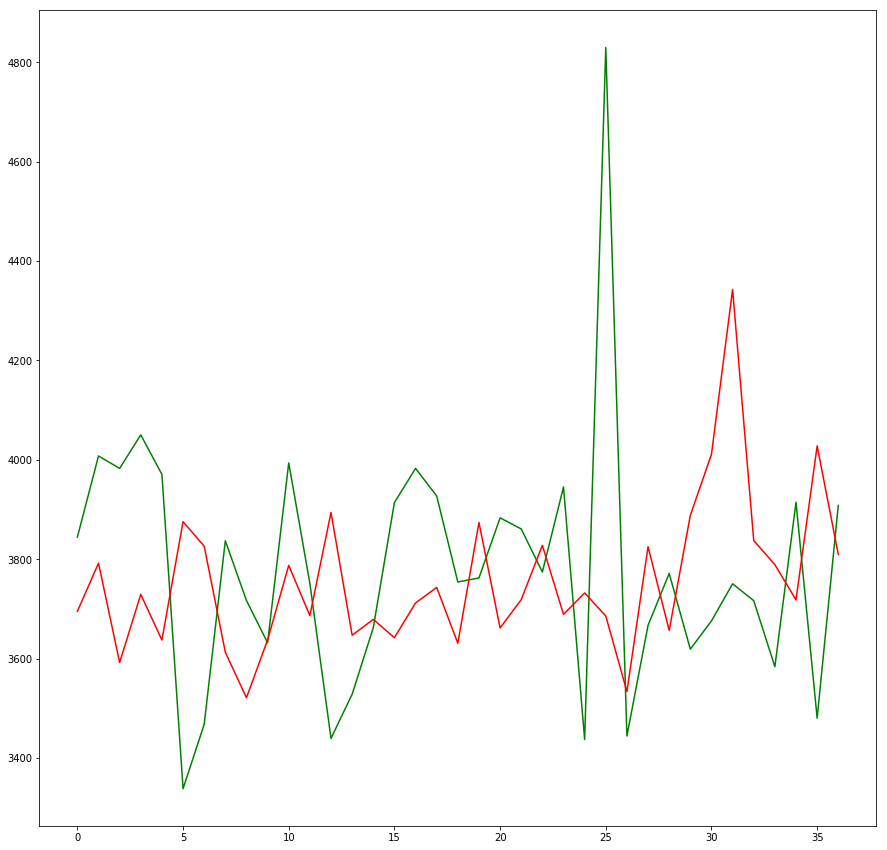

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,15))
plt.plot(test_a_10,c ='g')
plt.plot(test_p_10,c ='r')
plt.show()

In [0]:
result_test = pd.DataFrame({'Y_Pred':test_p_10,'Y_True':test_a_10},columns = ['Y_Pred','Y_True'])
result_train = pd.DataFrame({'Y_Pred':train_p_10,'Y_True':train_a_10},columns = ['Y_Pred','Y_True'])
result_test.to_csv('weekly_result_test_A.csv')
result_train.to_csv('weekly_result_train_A.csv')